In [96]:
from sklearn.preprocessing import normalize as skl_normalize
from matplotlib.pylab import show, cm, axis
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys

In [97]:
def normalize_cols(target_matrix):
    return skl_normalize(target_matrix, norm="l1", axis=0)

def inflate_matrix(target_matrix, factor):
    return normalize_cols(np.power(target_matrix, factor))

def expand_matrix(target_matrix, factor):
    return np.linalg.matrix_power(target_matrix, factor)

In [98]:
def get_clusters(target_matrix):
    print("Matrix to 'cluster':\n", target_matrix)
    clusters = []
    for i, edge in enumerate(target_matrix): 
        #* Check whether the there is connection between origin node and currently checked one
        if edge[i]:
            #* print(f"For node {i} we have: {edge} → {target_matrix[i,:]}")
            clusters.append(edge)
            
    clust_map = {}
    for cluster_id, cluster in enumerate(clusters): #* loop over clusters list and retrieve connected nodes ids 
        cluster_nodes = [ i for i, node in enumerate(cluster) if node ]
        #* print(f"For cluster {cluster_id} we have: {cluster} \n\t→\tnodes: {cluster_nodes}")
        clust_map[cluster_id] = cluster_nodes
    return clust_map

def stop_condition(matrix, iteration):
    #* print("Stop matrix: ", matrix)
    if iteration % 5 == 4:
        m = np.max( matrix**2 - matrix) - np.min( matrix**2 - matrix)
        #* print("m = ", m)
        if m == 0:
            print("Stop at iteration %s" % iteration)
            return True
    return False


def markov_chain(M, max_loop = 10):
    expand_factor = 2
    inflate_factor = 2
    diag_factor = 1
    
    M = M + diag_factor * np.identity(M.shape[0])   #* add self-loops to the matrix by setting diagonal 1
    #* print("My M after diagonalization", M)
    M = normalize_cols(M)
    
    for i in range(max_loop):
        M = expand_matrix(M, expand_factor)         #* expand by raising the matrix to the given power
        M = inflate_matrix(M, inflate_factor)       #* inflate the given matrix by raising each element to the given power
        if stop_condition(M, i):                    #* if values 'converged' to ones (1) → stop the markov algorithm
            break

    clusters = get_clusters(M)
    return M, clusters

def networkx_markov_chain(graph, max_loop=75):
    A = np.array(nx.adjacency_matrix(graph).todense())
    return markov_chain(A, max_loop)

def draw_graph(graph, cluster_map, arrows):
    _, _ = plt.subplots(figsize=(15,8))
    graph = nx.Graph(graph)
    clust_map = {v: k for k, vals in cluster_map.items() for v in vals}   
    colors = [clust_map.get(i, 100) for i in range(len(graph.nodes()))]
    nx.draw_networkx(graph, node_color=colors, linewidths=5, arrows=arrows, cmap='gist_rainbow')
    axis("off")
    show(block=False)

def calculate_and_draw(graph, arrows=None): 
    M = nx.to_numpy_matrix(graph)
    print("Nodes number: %s\n" % M.shape[0])
    
    M, clusters = networkx_markov_chain(graph)
    print(f"\nClustering result:")
    for key, value in clusters.items():
        print(key, ": ", value) 
    
    draw_graph(graph, clusters, arrows)



Nodes number: 16

Stop at iteration 14
Matrix to 'cluster':
 [[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Clustering result:
0 :  [0, 1]
1 :  [2, 3]
2 :  [4, 5]
3 :  [6, 7]
4 :  [8, 9]
5 :  [10, 12]
6 :  [11, 13]
7 :  [14, 15]


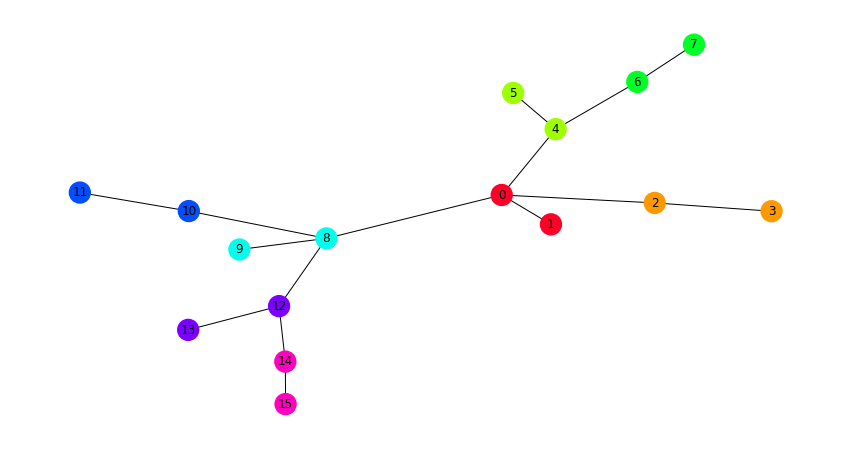

In [99]:
bin_graph = nx.binomial_tree(4) 
calculate_and_draw(bin_graph)

Nodes number: 15

Matrix to 'cluster':
 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0. ]
 [1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]

Clustering re

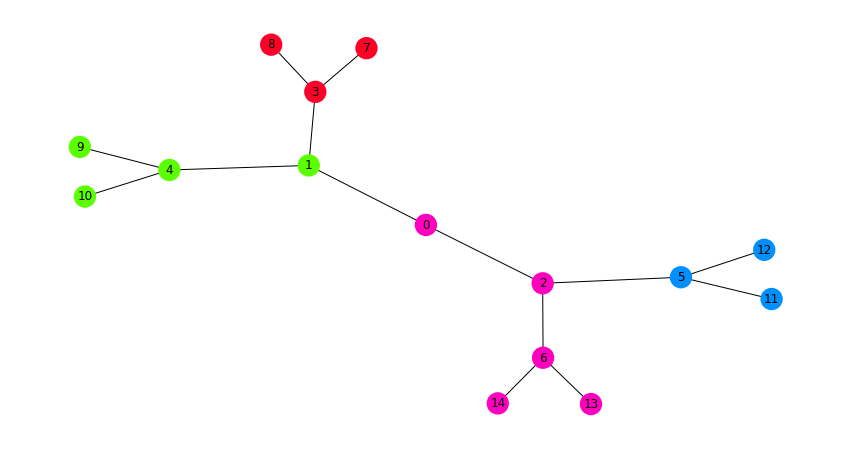

In [100]:
balanced_graph = nx.balanced_tree(2,3) # perfectly balanced 
calculate_and_draw(balanced_graph)

Nodes number: 31

Stop at iteration 69
Matrix to 'cluster':
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0

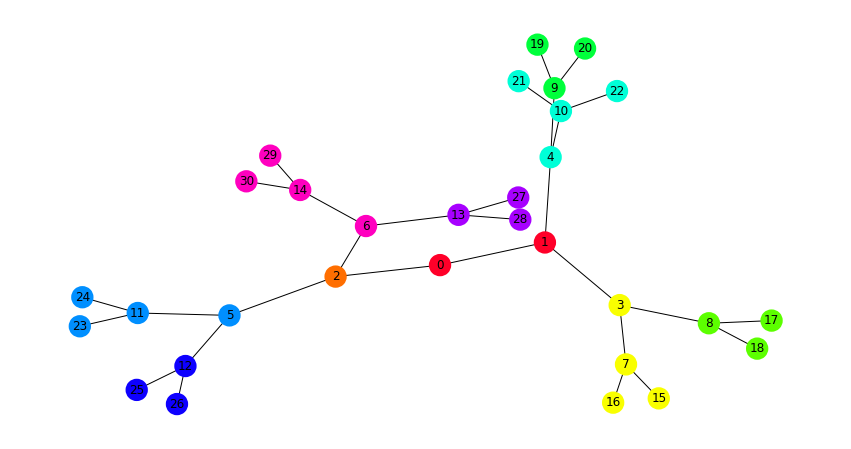

In [101]:
balanced_graph = nx.balanced_tree(2,4) 
calculate_and_draw(balanced_graph)

Nodes number: 10

Stop at iteration 14
Matrix to 'cluster':
 [[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]

Clustering result:
0 :  [0, 5]
1 :  [1, 2]
2 :  [4, 6, 7]
3 :  [8]
4 :  [3, 9]


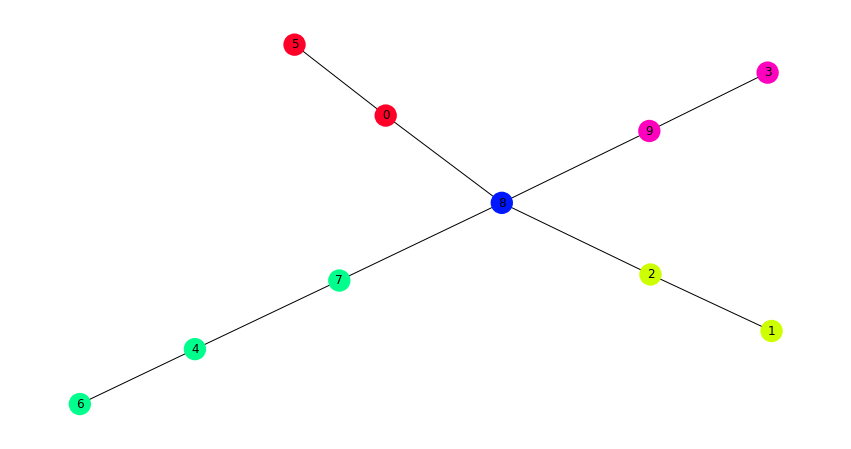

In [ ]:
random_tree = nx.random_tree(10) # uniformly random tree 
calculate_and_draw(random_tree)

### Directed graph

Nodes number: 10

Matrix to 'cluster':
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.5        1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.         0.         1.         0.       

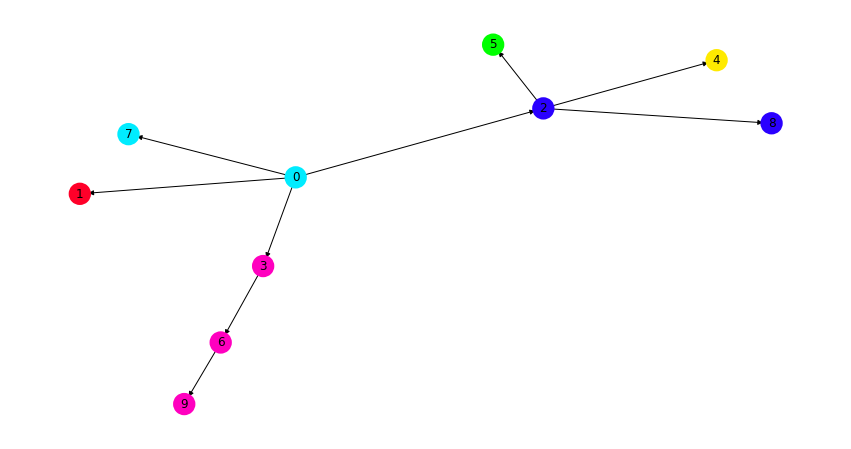

In [102]:
gn_graph = nx.gn_graph(10) # growing network digraph 
calculate_and_draw(gn_graph, arrows=True)